In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_csv("Homicídios_1996_2024.csv")
df

,DataObito,TipificacaoJuridico,Municipio,Bairro,Rua/Logradouro,RISP,IdadeEnvolvido,Genero,CorEnvolvido,Latitude,Longitude
0,1/1/1996,Homicídio Doloso,MUNIZ FREIRE,NaN,NaN,RISP 05,39.0,1 - Masculino,Não Informado,NaN,NaN
1,1/1/1996,Homicídio Doloso,VILA VELHA,NaN,NaN,RISP 01,21.0,1 - Masculino,Não Informado,NaN,NaN
2,1/1/1996,Homicídio Doloso,VITORIA,NaN,NaN,RISP 01,23.0,1 - Masculino,Não Informado,NaN,NaN
3,1/1/1996,Homicídio Doloso,SERRA,NaN,NaN,RISP 01,NaN,1 - Masculino,Não Informado,NaN,NaN
4,1/1/1996,Homicídio Doloso,VILA VELHA,NaN,NaN,RISP 01,NaN,1 - Masculino,Não Informado,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43029,12/29/2024,Homicídio Doloso,GUARAPARI,BELA VISTA,RUA MANTENOPOLIS,RISP 01,35.0,2 - Feminino,Parda,"'-20,6415","'-40,5129"
43030,12/29/2024,Homicídio Doloso,SANTA MARIA DE JETIBA,CARAMURU II,RUA NÃO CADASTRADA,RISP 05,24.0,1 - Masculino,Branca,"'-20,0968","'-40,6764"
43031,12/30/2024,Homicídio Doloso,GUARAPARI,VILLAGE DO SOL,RUA MANOEL LOYOLA,RISP 01,31.0,1 - Masculino,Parda,"'-20,5551","'-40,4068"
43032,12/30/2024,Homicídio Doloso,VILA VELHA,JARDIM MARILANDIA,RUA NÃO CADASTRADA,RISP 01,42.0,1 - Masculino,Parda,"'-20,3576","'-40,3484"


In [28]:
df['IdadeEnvolvido'] = df['IdadeEnvolvido'].fillna(df['IdadeEnvolvido'].mean())

---------- TESTE DE GAUSS (normalidade) ----------

In [29]:
stat, p = normaltest(df['IdadeEnvolvido'])

print(f"\nTeste de Normalidade para IdadeEnvolvido (D’Agostino):")
print(f"Estatística: {stat:.4f}, p-valor: {p:.4f}")
if p < 0.05:
    print("A variável **não segue** distribuição normal (rejeita H0).")
else:
    print("A variável **segue** distribuição normal (não rejeita H0).")


Teste de Normalidade para IdadeEnvolvido (D’Agostino):
Estatística: 9166.4086, p-valor: 0.0000
A variável **não segue** distribuição normal (rejeita H0).


---------- MODELO GAUSSIANO (com classe artificial) ----------

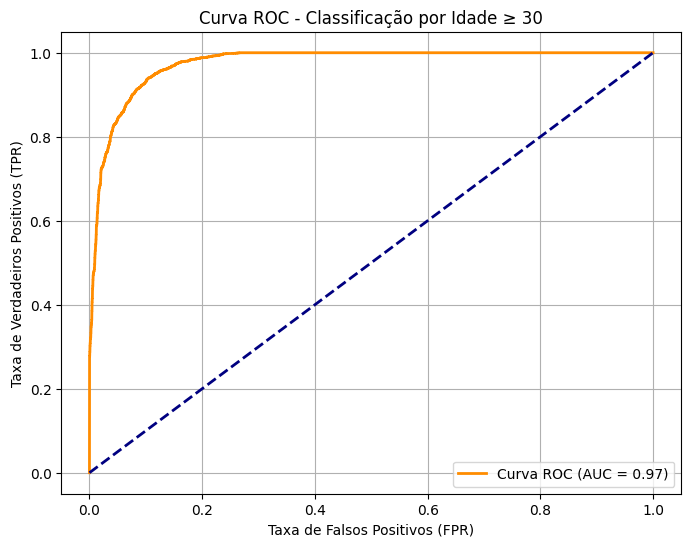


Precision: 0.91
Recall: 0.84
AUC: 0.97


In [30]:
df['status'] = df['IdadeEnvolvido'].apply(lambda x: 1 if x >= 30 else 0)


df_le = df.copy()
colunas_categoricas = df_le.select_dtypes(include='object').columns
label_encoders = {}

for col in colunas_categoricas:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col].astype(str))
    label_encoders[col] = le

X = df_le.drop(columns=['status'])
y = df_le['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Classificação por Idade ≥ 30')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {roc_auc:.2f}')

Tabela de Homicídios por Ano:
     Ano  TotalHomicidios
0   1996              503
1   1997              590
2   1998              669
3   1999              645
4   2000              599
5   2001              633
6   2002              703
7   2003              719
8   2004              705
9   2005              648
10  2006              753
11  2007              724
12  2008              787
13  2009              790
14  2010              711
15  2011              652
16  2012              664
17  2013              589
18  2014              649
19  2015              553
20  2016              469
21  2017              601
22  2018              429
23  2019              405
24  2020              431
25  2021              415
26  2022              418
27  2023              406


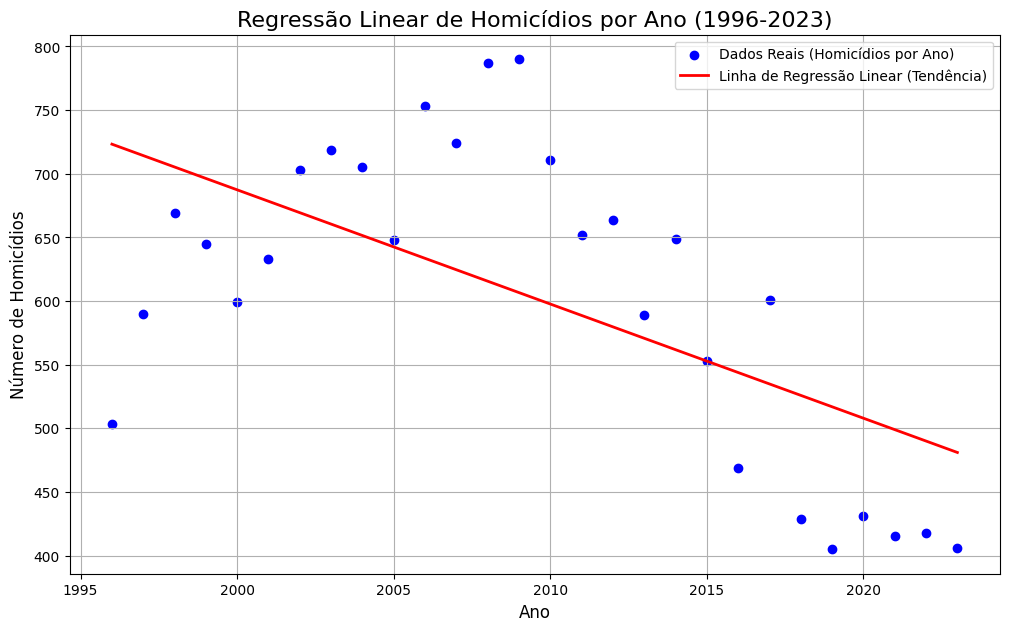


--- Resultados da Regressão Linear ---
Coeficiente Angular (Slope): -8.972
Intercepto (Intercept): 18631.548

Equação da Reta: Número de Homicídios = -8.972 * Ano + 18631.548


In [31]:
try:
    df = pd.read_csv('Homicídios_1996_2024.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'Homicídios_1996_2024.csv' não encontrado.")
    print("Por favor, verifique se o nome e o caminho do arquivo estão corretos.")
    exit()

df['DataObito'] = pd.to_datetime(df['DataObito'], dayfirst=True, errors='coerce')

df['Ano'] = df['DataObito'].dt.year

df.dropna(subset=['Ano'], inplace=True)

df['Ano'] = df['Ano'].astype(int)

df_filtrado = df[df['Ano'] <= 2023].copy()

homicidios_por_ano = df_filtrado.groupby('Ano').size().reset_index(name='TotalHomicidios')

print("Tabela de Homicídios por Ano:")
print(homicidios_por_ano)

X = homicidios_por_ano['Ano'].values.reshape(-1, 1)
y = homicidios_por_ano['TotalHomicidios'].values


modelo = LinearRegression()
modelo.fit(X, y)

linha_regressao = modelo.predict(X)

plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Dados Reais (Homicídios por Ano)')
plt.plot(X, linha_regressao, color='red', linewidth=2, label='Linha de Regressão Linear (Tendência)')
plt.title('Regressão Linear de Homicídios por Ano (1996-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Homicídios', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


coeficiente_angular = modelo.coef_[0]
intercepto = modelo.intercept_

print("\n--- Resultados da Regressão Linear ---")
print(f"Coeficiente Angular (Slope): {coeficiente_angular:.3f}")
print(f"Intercepto (Intercept): {intercepto:.3f}")

print(f"\nEquação da Reta: Número de Homicídios = {coeficiente_angular:.3f} * Ano + {intercepto:.3f}")


In [32]:
#As metricas estao acima de 0.8 o que indica que sao boas e confiaveis, ou seja
#o modelo consegue corretamente prever o status do futuro candidato

In [33]:
#Grupo: 
# Eve Chalabi de Vasconcellos
# Yasmin Neumann
# Yasmin Sousa
# Will Oliveira

In [34]:
#Links utilizados na execucao do trabalho: 
#https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351
#https://pandas.pydata.org/docs/reference/frame.html
#https://openai.com/index/chatgpt/
#https://www.datacamp.com/pt/tutorial/auc
#https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
#Eu inseri o link da documentacao do dataframe pandas pois procurei varios itens dentro e listar cada link individual seria um pouco longo/desnecessario 